# The Indian Power Infrastructure - An Analysis

## India has been an economic superpower for a long time and to meet it's ever growing population and economy, huge investments in the field of energy has been made.

### Here,we look at some of the questions which one might get when they see the Indian power infrastructure data yearwise and statewise.

First let use clean our data and make it easier to use for our analysis.

In [1]:
import pandas as pd
import numpy as np
infra_df = pd.read_csv('India_Statewise_Power_Infrastructure_Data_RBI.csv')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
infra_df.replace('-',np.nan,inplace=True)
infra_df.replace('.',np.nan,inplace=True)
infra_df

,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
0,Andaman and Nicobar Islands,2004-05,NaN,NaN,NaN,65
1,Andhra Pradesh,2004-05,5042,5006,656.9,10809
2,Arunachal Pradesh,2004-05,16,16,143.9,187
3,Assam,2004-05,379,358,134.4,1133
4,Bihar,2004-05,720,648,78,1644
...,...,...,...,...,...,...
607,Telangana,2020-21,6700,6699,1904.5,17218
608,Tripura,2020-21,148,148,402.5,724
609,Uttar Pradesh,2020-21,12437,12338,618.1,27896
610,Uttarakhand,2020-21,1383,1382,1365.8,3731


In [4]:
infra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 6 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   State/Union Territory                           612 non-null    object
 1   Year                                            612 non-null    object
 2   Power_Requirement_Net_Crore_Units               599 non-null    object
 3   Availability_Of_Power_Net_Crore_Units           599 non-null    object
 4   Availability_Of_Power_Per_Capita_kiloWatt-Hour  599 non-null    object
 5   Installed_Power_Capacity_MegaWatt               602 non-null    object
dtypes: object(6)
memory usage: 28.8+ KB


## Brief for who are new to terms of electricity in the data used: 

There are 6 columns in the given dataset.Power requirement or availability or the generation of it is calculated in terms of units of power which is a standard kiloWatt-hour.It is the energy used.Installed power capacity is given in MegaWatts,which is the maximum capacity of all the electricity generation plants and sources included.This distinction is important to be understood.
To understand,let's consider a wind turbine with a capacity of 1.5 MegaWatts ,which when used or run at maximum capacity for 2 hours leads to a power generation of 3 MegaWatt-hours of energy.

In [5]:
infra_df.dropna(inplace=True)

In [6]:
infra_df['Power_Requirement_Net_Crore_Units'] = infra_df['Power_Requirement_Net_Crore_Units'].astype(float)

In [7]:
infra_df['Installed_Power_Capacity_MegaWatt'] = pd.to_numeric(infra_df['Installed_Power_Capacity_MegaWatt'])
infra_df['Availability_Of_Power_Net_Crore_Units'] = pd.to_numeric(infra_df['Availability_Of_Power_Net_Crore_Units'])
infra_df['Availability_Of_Power_Per_Capita_kiloWatt-Hour'] = pd.to_numeric(infra_df['Availability_Of_Power_Per_Capita_kiloWatt-Hour']);

In [8]:
infra_df['YearInitial'] = infra_df['Year'].str[:4]

In [9]:
infra_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599 entries, 1 to 611
Data columns (total 7 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   State/Union Territory                           599 non-null    object 
 1   Year                                            599 non-null    object 
 2   Power_Requirement_Net_Crore_Units               599 non-null    float64
 3   Availability_Of_Power_Net_Crore_Units           599 non-null    int64  
 4   Availability_Of_Power_Per_Capita_kiloWatt-Hour  599 non-null    float64
 5   Installed_Power_Capacity_MegaWatt               599 non-null    int64  
 6   YearInitial                                     599 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 37.4+ KB


In [10]:
infra_df.describe()

,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
count,599.000000,599.000000,599.000000,599.000000
mean,2698.058431,2568.003339,1548.749917,6368.759599
std,3404.512495,3248.278665,2904.840368,8744.892857
min,2.000000,2.000000,78.000000,1.000000
25%,159.000000,154.500000,426.950000,249.000000
50%,1042.000000,968.000000,762.300000,2514.000000
75%,4483.500000,4182.000000,1401.600000,9105.500000
max,15829.000000,15816.000000,20064.400000,44166.000000


In [22]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Let's get started 

## 1. The improvement in infrastructure over the years

To find the improvement in the energy sector over the years , we use the `Installed Power Capacity in MW` data.

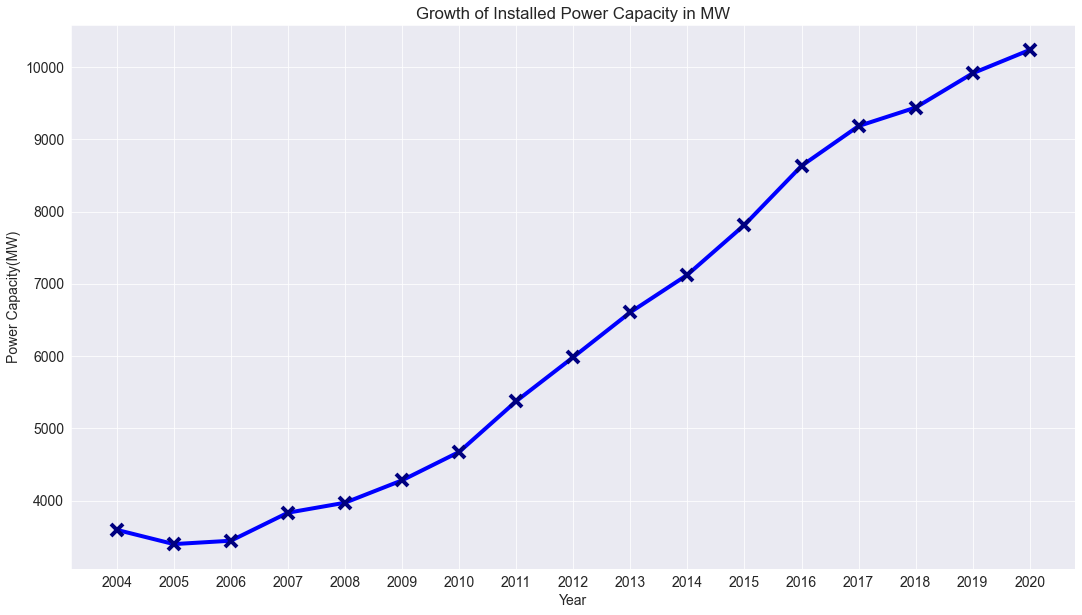

In [23]:
pow_cap_df = infra_df.groupby('YearInitial')[['Installed_Power_Capacity_MegaWatt']].mean()
pow_cap_df
plt.plot(pow_cap_df.index,pow_cap_df.Installed_Power_Capacity_MegaWatt,'b-x', linewidth=4,markersize = 12,markeredgewidth=4,markeredgecolor='navy')
plt.title('Growth of Installed Power Capacity in MW')
plt.xlabel('Year');plt.ylabel('Power Capacity(MW)');

We can see a steady growth of the power capacities after 2010.


##  2. Analysis of states which have the highest power expenditure

Let's look at the states or union territories which use the most power

In [24]:
#bar 
states = infra_df['YearInitial'] == '2020'
states_df = infra_df[states].sort_values('Power_Requirement_Net_Crore_Units',ascending=False).head(10)

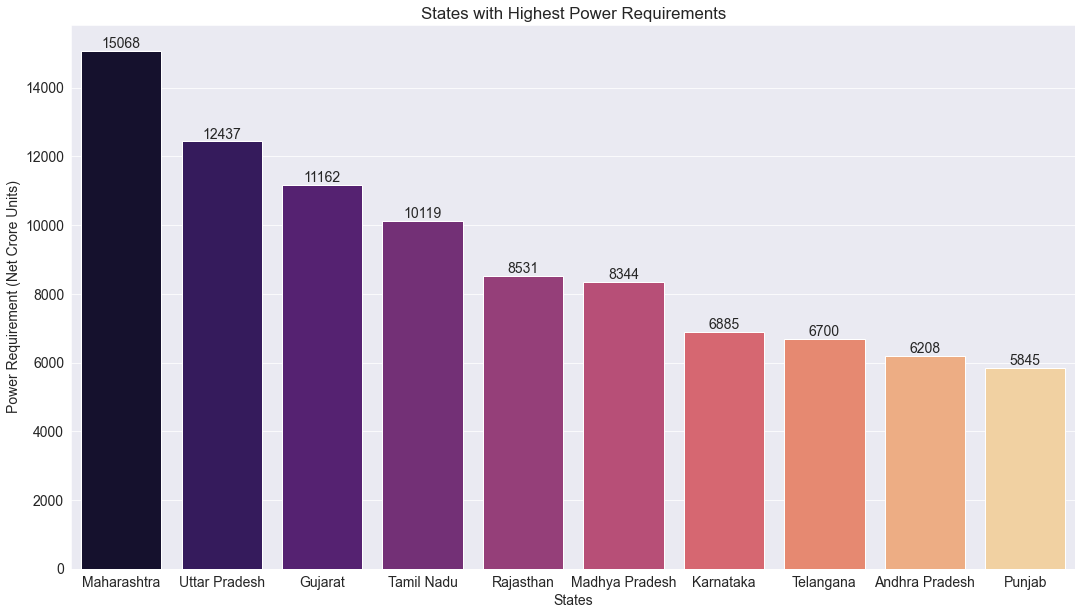

In [25]:
plt.title('States with Highest Power Requirements')
gfg = sns.barplot(x=states_df['State/Union Territory'],y=states_df.Power_Requirement_Net_Crore_Units, palette='magma')
for i in gfg.containers:
    gfg.bar_label(i,)
gfg.set_xlabel('States')
gfg.set_ylabel('Power Requirement (Net Crore Units)');

Thus, one can observe that Maharashtra needs the highest power of all the states,with Uttar Pradesh being second.

## 3. States with the highest installed capacity as of 2020

Installed Power Capacity of the state would correspond to the power expenditure of the state.It might be due to the high population or the number of industries and the type of industry concentrated in the state.

In [28]:
states1 = infra_df['YearInitial'] == '2020'
states1_df = infra_df[states1].sort_values('Installed_Power_Capacity_MegaWatt',ascending=False).head(10)

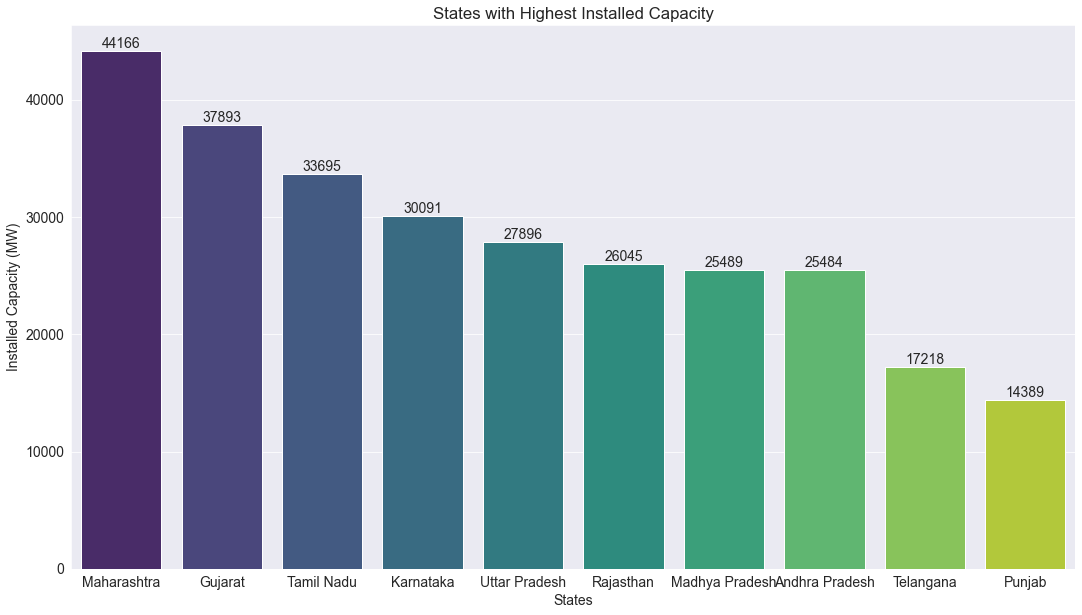

In [29]:
plt.title('States with Highest Installed Capacity')
gfgg = sns.barplot(x=states1_df['State/Union Territory'],y=states1_df.Installed_Power_Capacity_MegaWatt, palette='viridis')
for i in gfgg.containers:
    gfgg.bar_label(i,)
gfgg.set_xlabel('States')
gfgg.set_ylabel('Installed Capacity (MW)');

Both the Installed Capacity and Power Requirement plots have the same states at the top which should be the case ,but states like Tamil Nadu and Karnataka have a lot higher capacities to handle their capacities owing to their other means of generation of electricity including renewable sources like wind energy.

## 4. Availability of Power Per Capita

`Availability of Power Per Capita(kWh)` over the years and statewise is seen.This data shows the power available per person in a state based on its population and can be a good parameter to consider in planning future power infrastructure for the nation.

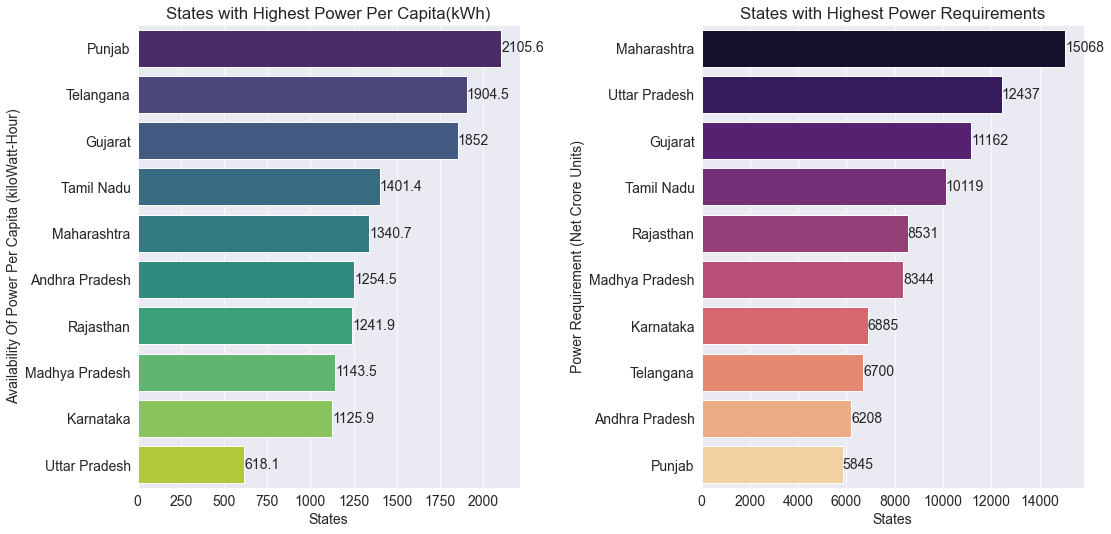

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))


per_cap = states1_df.sort_values('Availability_Of_Power_Per_Capita_kiloWatt-Hour',ascending=False).head(10)
pc = sns.barplot(y=per_cap['State/Union Territory'],x=per_cap['Availability_Of_Power_Per_Capita_kiloWatt-Hour'], palette='viridis',ax=axes[0])
for i in pc.containers:
    pc.bar_label(i,)
axes[0].set_title('States with Highest Power Per Capita(kWh)')
axes[0].set_xlabel('States')
axes[0].set_ylabel('Availability Of Power Per Capita (kiloWatt-Hour)');

gfg = sns.barplot(y=states_df['State/Union Territory'],x=states_df.Power_Requirement_Net_Crore_Units, palette='magma',ax=axes[1])
for i in gfg.containers:
    gfg.bar_label(i,)
axes[1].set_title('States with Highest Power Requirements')
axes[1].set_xlabel('States')
axes[1].set_ylabel('Power Requirement (Net Crore Units)');

plt.tight_layout(pad=2);

Punjab has the highest per capita power whereas by comparison Maharashtra has the highest power requirements overall.We can observe that the states are the same but people spend energy differently.
A person in Maharashtra almost spends only half of what a person in Punjab spends,maybe due to factors like climate or economic class, but Maharashtra has the highest total power requirement owing to it's overwhelming population.

## 5. Heatmap

Let's look at a heatmap of the installed capacities in different states over the years.

In [34]:
states2 = infra_df['YearInitial'] > '2010'
state_list = states1_df['State/Union Territory'].tolist()
df1 = infra_df.loc[(infra_df['State/Union Territory'].isin(state_list)) & (infra_df['YearInitial'] > '2010')]

In [35]:
df2 = df1.pivot('State/Union Territory','YearInitial','Installed_Power_Capacity_MegaWatt')
df2

YearInitial,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
State/Union Territory,,,,,,,,,,
Andhra Pradesh,16095.0,16949.0,17731.0,11275.0,14827.0,22298.0,23674.0,24184.0,24854.0,25484.0
Gujarat,21972.0,26414.0,27647.0,28961.0,29611.0,30716.0,31043.0,32291.0,35211.0,37893.0
Karnataka,13394.0,13759.0,14270.0,15150.0,17037.0,21317.0,27157.0,28075.0,29825.0,30091.0
Madhya Pradesh,8780.0,10632.0,13805.0,15845.0,17644.0,19618.0,21728.0,23334.0,24821.0,25489.0
Maharashtra,26142.0,30354.0,34867.0,38355.0,40376.0,41410.0,43255.0,44144.0,43496.0,44166.0
Punjab,7056.0,7509.0,8379.0,10525.0,12455.0,14162.0,13432.0,13432.0,14205.0,14389.0
Rajasthan,10161.0,12156.0,14282.0,16229.0,17784.0,19776.0,21684.0,22589.0,25360.0,26045.0
Tamil Nadu,17602.0,19433.0,21193.0,22884.0,24747.0,29112.0,30327.0,31059.0,32840.0,33695.0
Telangana,NaN,NaN,NaN,9470.0,10892.0,11501.0,15139.0,15826.0,16024.0,17218.0


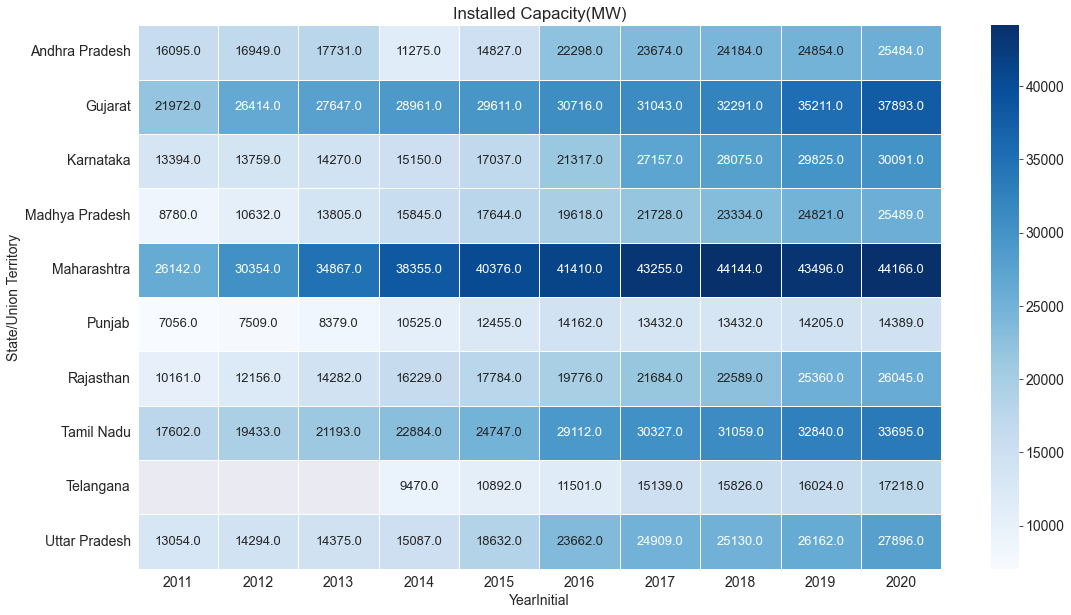

In [36]:
plt.title('Installed Capacity(MW)')
sns.heatmap(df2,fmt='',annot=True,linewidths=.5,cmap='Blues',annot_kws={'fontsize':13});

Since Telengana was created in June-2014,data for the previous years are not available.An overall view of the capacities in different states are seen.

# Inferences and Conclusions

Here's a summary of all the inferences we can draw from the analysis of the given data about the state of the Indian Power infrastructure:

- The growth of the power Infrastructure is steady after the year 2010.The mean of the installed power capacities in MW was taken to plot the graph over the years.
- Highest power requirements of all the states can be observed and it is no surprise to see all the top 10 states having the most population too.
- It is interesting to note that the same states also having the highest available per capita power are not in the same order as the states have the highest power requirements.
- Also states like Punjab having the highest available power per capita are the last in the states having the highest power requirements.It takes the last place in the highest installed capacity plot as well.This discrepancy may be due lesser population and Punjab being the second richest state in India by average per capita income.So this confirms it's high per capita available power.

# References and Future Work

- Kaggle Indian Power Infrastructure Dataset(2004-2021) by Vineet Jha: https://www.kaggle.com/datasets/hangryjay/india-power-infrastructure-data
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html

Note:
- Per Capita Availability of Power is worked out based on Census Population 2011 and for the population for Andhra Pradesh and Telangana drawn from both Governments’ portals for the years 2014-15 and 2018-19.

- Figures of Telangana are w.e.f. June 2014 due to bifurcation of Andhra Pradesh into Andhra Pradesh and Telangana w.e.f. June 2, 2014

Future work may include more questions by comparing the data to climatic and economic conditions.Data like per capita consumption might have been more helpful for comparisons.This data was primarily for time series analysis and forecasting.

In [37]:
!pip install jovian --upgrade

  Using cached jovian-0.2.41-py2.py3-none-any.whl (68 kB)
  Using cached uuid-1.30.tar.gz (5.8 kB)
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6503 sha256=d7d4974aef1a013468f1b4def7b9ee4ff081126752619c359fdcd8fcb8a781be
  Stored in directory: c:\users\harih\appdata\local\pip\cache\wheels\05\d7\b4\4795d29c6decfffbf64c63e58b6c8b8bbfd4751488617dcd7a
Successfully built uuid


In [38]:
import jovian

<IPython.core.display.Javascript object>

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/harihsj/firstversion


'https://jovian.ai/harihsj/firstversion'